<a href="https://colab.research.google.com/github/2714830587-xh/Hello-World/blob/master/DTW%E7%9B%B8%E5%85%B3%E7%AC%94%E8%AE%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## DTW **笔记** 
视频:https://www.bilibili.com/video/av756972228?from=search&seid=5957610130024266909&spm_id_from=333.337.0.0
DTW文章:https://blog.csdn.net/qq_40206371/article/details/122564982?spm=1001.2014.3001.5501

soft-DTW:https://blog.csdn.net/qq_40206371/article/details/122568648
https://zhuanlan.zhihu.com/p/346674141
```
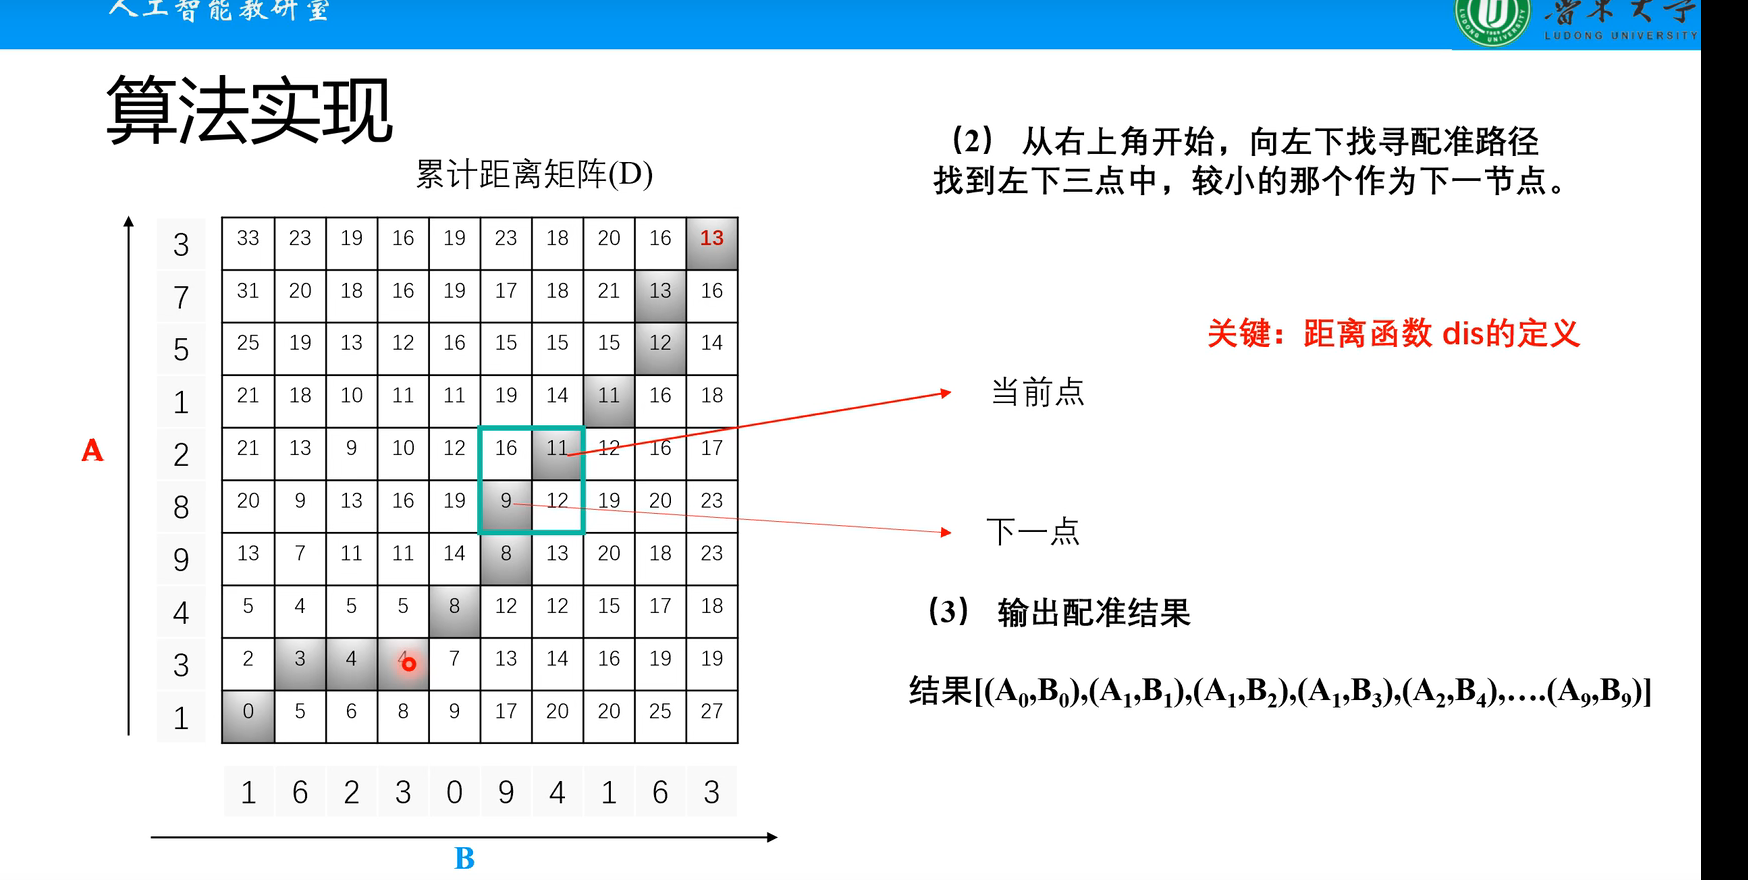

```



In [1]:
import numpy as np
def dis_abs(a,b):
  return abs(a-b)
def dtw(A,B, dis_func=dis_abs):
    NA=len(A)
    NB=len(B)
    D=np.zeros([NA,NB])
    D[0,0]=dis_func(A[0],B[0])
    for i in range(1,NA):
        D[i,0]=D[i-1,0]+dis_func(B[0],A[i])
    for j in range(1,NB):
        D[0,j]=D[0,j-1]+dis_func(A[0],B[j])
    for i in range(1,NA):
        for j in range(1,NB):
            D[i,j]=dis_func(A[i],B[j])+min(D[i-1,j],D[i,j-1],D[i-1,j-1])
    #     路径回溯
    i=NA-1
    j=NB-1
    d=np.zeros(max(NA,NB)*3)
    print(d)
    count=0
    path=[]
    while True:
        if i>0 and j>0:
            path.append((i,j))
            m=min(D[i,j-1],D[i-1,j],D[i-1,j-1])
            if m==D[i-1,j-1]:
                d[count]=D[i,j]-D[i-1,j-1]
                i=i-1
                j=j-1
                count=count+1
            elif m==D[i-1,j]:
                d[count]=D[i,j]-D[i-1,j]
                i=i-1
                count=count+1
            elif m==D[i,j-1]:
                d[count]=D[i,j]-D[i,j-1]
                j=j-1
                count=count+1
        elif i==0 and j==0:
            path.append((i,j))
            d[count]=D[i,j]
            count=count+1
            break;
        elif j==0:
            path.append((i,j))
            d[count]=D[i,0]-D[i-1,0]
            i=i-1
            count=count+1
        elif i==0:
            path.append((i,j))
            d[count]=D[0,j]-D[0,j-1]
            j=j-1
            count=count+1
    mean=np.sum(d)/count
    return D,path,mean,d


a=np.array([1,3,4,9,8,2,1,5,7,3])
b=np.array([1,6,2,3,0,9,4,1,6,3])
a=a[:,np.newaxis]
b=b[:,np.newaxis]
D,path,mean,d=dtw(a,b,dis_func=dis_abs)
print(D)
print(path[::-1])
print(mean)
print(d[::-1])

  
  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[[ 0.  5.  6.  8.  9. 17. 20. 20. 25. 27.]
 [ 2.  3.  4.  4.  7. 13. 14. 16. 19. 19.]
 [ 5.  4.  5.  5.  8. 12. 12. 15. 17. 18.]
 [13.  7. 11. 11. 14.  8. 13. 20. 18. 23.]
 [20.  9. 13. 16. 19.  9. 12. 19. 20. 23.]
 [21. 13.  9. 10. 12. 16. 11. 12. 16. 17.]
 [21. 18. 10. 11. 11. 19. 14. 11. 16. 18.]
 [25. 19. 13. 12. 16. 15. 15. 15. 12. 14.]
 [31. 20. 18. 16. 19. 17. 18. 21. 13. 16.]
 [33. 23. 19. 16. 19. 23. 18. 20. 16. 13.]]
[(0, 0), (1, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7), (7, 8), (8, 8), (9, 9)]
1.0833333333333333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0. 4. 0.
 1. 2. 0. 1. 1. 0.]
